In [40]:
import re
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from sklearn.neural_network import MLPClassifier

In [41]:
data = pd.read_csv("/Users/tanmayvakare/Documents/projects/sentiment-analysis/data/twitter-sentiment-analysis2/train.csv",  encoding = "ISO-8859-1")
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tanmayvakare/Documents/projects/sentiment-analysis/data/twitter-sentiment-analysis2/train.csv'

<BarContainer object of 2 artists>

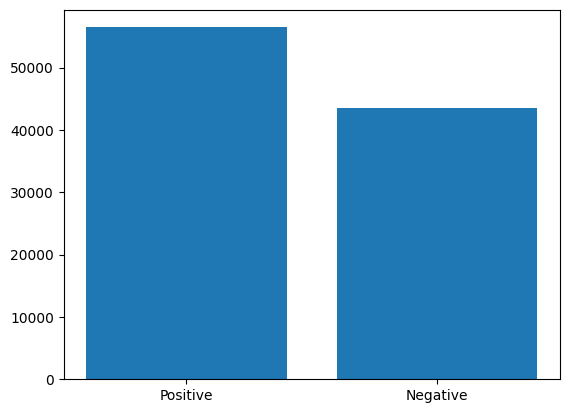

In [ ]:
positive = len(data[data.Sentiment == 1])
negative = len(data[data.Sentiment == 0])
plt.bar(["Positive","Negative"],[positive,negative])

In [ ]:
positive/negative

1.2969080216851971

In [30]:
text = data.SentimentText.iloc[19] + " @_tanmay5 ...."
print(text.strip())
re.sub(r"@[A-Za-z0-9_]*","<user>", text.strip())

I just cut my beard off. It's only been growing for well over a year. I'm gonna start it over. @shaunamanu is happy in the meantime. @_tanmay5 ....


"I just cut my beard off. It's only been growing for well over a year. I'm gonna start it over. <user> is happy in the meantime. <user> ...."

In [31]:
def review_to_wordlist(review):#, remove_stopwords=True):
    # Clean the text, with the option to remove stopwords.
    
    # Convert words to lower case and split them
    words = review.lower().split()

    # Optionally remove stop words (true by default)
#     if remove_stopwords:
#         stops = set(stopwords.words("english"))
#         words = [w for w in words if not w in stops]
    
    review_text = " ".join(words)

    # Clean the text
    review_text = re.sub(r"@[A-Za-z0-9_]*", "<user>", review_text)
    review_text = re.sub(r"[^A-Za-z0-9(),!.?\'\`]", " ", review_text)
    review_text = re.sub(r"\'s", "'s", review_text)
    review_text = re.sub(r"\'ve", "'ve", review_text)
    review_text = re.sub(r"n\'t", "'t", review_text)
    review_text = re.sub(r"\'re", "'re", review_text)
    review_text = re.sub(r"\'d", "'d", review_text)
    review_text = re.sub(r"\'ll", "'ll", review_text)
    review_text = re.sub(r",", " ", review_text)
    review_text = re.sub(r"\.", " ", review_text)
    review_text = re.sub(r"!", " ", review_text)
    review_text = re.sub(r"\(", " ", review_text)
    review_text = re.sub(r"\)", " ", review_text)
    review_text = re.sub(r"\?", " ", review_text)
    review_text = re.sub(r"\s{2,}", " ", review_text)
    
    words = review_text.split()
    
    # Shorten words to their stems
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in words]
    
    review_text = " ".join(stemmed_words)
    
    # Return a list of words
    return review_text

In [32]:
print(review_to_wordlist(data.SentimentText[19]))
data.SentimentText[19]

i just cut my beard off it onli been grow for well over a year i'm gonna start it over user is happi in the meantim


"    I just cut my beard off. It's only been growing for well over a year. I'm gonna start it over. @shaunamanu is happy in the meantime."

In [33]:
total_count = Counter()
for each in data.SentimentText:
    each = review_to_wordlist(each)
    for word in each.strip().split(" "):
        total_count[word] += 1
total_count = {key:count for key,count in total_count.most_common() if count > 1}

In [34]:
vocab = set(total_count.keys())
word2index = {word:idx for idx,word in enumerate(vocab)}
word2index[review_to_wordlist("true")]

48

In [35]:
thresh = int(0.2 * len(data))

train_x, train_Y = data.SentimentText.iloc[:thresh], data.Sentiment.iloc[:thresh]
test_x, test_Y = data.SentimentText.iloc[thresh:], data.Sentiment.iloc[thresh:]

In [36]:
def get_data_ready(input_data, word2index):
    
    coded_data = np.zeros((len(input_data),len(word2index)))
    i = 0
    for each in input_data:
        
        text = review_to_wordlist(each)
        
        for word in text.split(" "):
            
            if word in word2index:
                coded_data[i,word2index[word]] += 1
        
        i += 1
        
    return coded_data

In [37]:
row = get_data_ready(train_x, word2index)
row

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
epochs = 50
lr = 0.003
hidden_layer = (10)
alpha = 0.001

model = MLPClassifier(activation="relu", hidden_layer_sizes=hidden_layer, learning_rate_init=lr, 
                    validation_fraction=0.25, solver = "adam", max_iter = epochs, 
                      verbose = True, alpha = alpha, learning_rate = "adaptive")
model

MLPClassifier(alpha=0.001, hidden_layer_sizes=10, learning_rate='adaptive',
              learning_rate_init=0.003, max_iter=50, validation_fraction=0.25,
              verbose=True)

In [39]:
train_X = get_data_ready(train_x, word2index)

model.fit(train_X,train_Y)

Iteration 1, loss = 0.56905771
Iteration 2, loss = 0.42368694
Iteration 3, loss = 0.35872734
Iteration 4, loss = 0.31722613
Iteration 5, loss = 0.28478866
Iteration 6, loss = 0.26203297
Iteration 7, loss = 0.24170496
Iteration 8, loss = 0.22471889
Iteration 9, loss = 0.21061812
Iteration 10, loss = 0.19790543
Iteration 11, loss = 0.18737302
Iteration 12, loss = 0.17767740
Iteration 13, loss = 0.16645702
Iteration 14, loss = 0.15908907
Iteration 15, loss = 0.15035390
Iteration 16, loss = 0.14202531
Iteration 17, loss = 0.13436577
Iteration 18, loss = 0.12686678
Iteration 19, loss = 0.12014744
Iteration 20, loss = 0.11390859
Iteration 21, loss = 0.10904225
Iteration 22, loss = 0.10279512
Iteration 23, loss = 0.09740776
Iteration 24, loss = 0.09320793
Iteration 25, loss = 0.08857641
Iteration 26, loss = 0.08410470
Iteration 27, loss = 0.08049546
Iteration 28, loss = 0.07778125
Iteration 29, loss = 0.07316493
Iteration 30, loss = 0.07093970
Iteration 31, loss = 0.06851107
Iteration 32, los

/Users/tanmayvakare/.pyenv/versions/3.9.1/envs/senti-bo/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=10, learning_rate='adaptive',
              learning_rate_init=0.003, max_iter=50, validation_fraction=0.25,
              verbose=True)

In [40]:
test_X = get_data_ready(test_x, word2index)

score_test = model.score(test_X,test_Y)
score_test = round(score_test,2)
score_test

0.69

In [41]:
tweet = "it is true"
tweet = get_data_ready([tweet],word2index)
#print(data.Sentiment.iloc[:10])
print(tweet)
model.predict(tweet)[0]

[[0. 0. 0. ... 0. 0. 0.]]


1

In [42]:
from pathlib import Path

import joblib

filepath = Path(f"../models/model-{score_test}-{lr}-{epochs}.joblib")
filepath.parent.mkdir()

joblib.dump(model,filepath)

['../models/model-0.69-0.003-50.joblib']

In [43]:
type(word2index)

dict

In [24]:
import json
import os

dictpath = Path("../dictionary/")
dictpath.mkdir()

with open(dictpath / "word2index.json", "w") as fl:
    fl.write(json.dumps(word2index, indent = 4))

In [29]:
import requests as rq
import joblib

In [31]:
url = "https://firebasestorage.googleapis.com/v0/b/sentibo-sentiment-analysis.appspot.com/o/dictionary%2Fword2index.json?alt=media&token=1f328386-4385-4a5a-840d-8e507cccf505"
url_2 = "https://firebasestorage.googleapis.com/v0/b/sentibo-sentiment-analysis.appspot.com/o/models%2Fmodel-0.69-0.003-50.joblib?alt=media&token=55080ccb-ba4a-4abc-94a0-40a39f70f40a"

In [32]:
res = rq.get(url_2)

In [33]:
model = joblib.load(res.content)

ValueError: embedded null byte

In [35]:
from io import BytesIO

In [36]:
buffer = BytesIO()

In [37]:
buffer.write(res.content)

4188392

In [38]:
model = buffer.read()

In [39]:
model

b''